In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect(database="matthewjones", user="matthewjones",host="localhost", port = '5432')

In [14]:
df = pd.read_sql_query('''
                        SELECT *
                        FROM 
                            "NYCovidData"
                        WHERE 
                            "county"='Albany'
                        '''
                        , con=conn,parse_dates='test_date',index_col='test_date')

In [15]:
df['% Positive'] = df['new_positives']/df['total_number_of_tests']
df['% Positive Cumulative'] = df['cumulative_number_of_positives']/df['cumulative_number_of_tests']
df.tail()

,county,new_positives,cumulative_number_of_positives,total_number_of_tests,cumulative_number_of_tests,% Positive,% Positive Cumulative
test_date,,,,,,,
2020-07-24,Albany,12,2438,632,70531,0.018987,0.034566
2020-07-25,Albany,13,2451,817,71348,0.015912,0.034353
2020-07-26,Albany,2,2453,820,72168,0.002439,0.033990
2020-07-27,Albany,15,2468,929,73097,0.016146,0.033763
2020-07-28,Albany,12,2480,843,73940,0.014235,0.033541


<AxesSubplot:xlabel='test_date'>

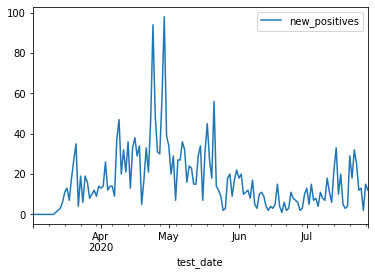

In [12]:
df.plot(y='new_positives',kind='line')